In [936]:
#Bu Projemde Mesaj spam mı değil mi onu tespit edecek Bir Model Geliştirmeye Çalışacağım.
import numpy as np
import pandas as pd 
import re # kütüphanesi (regular expressions veya düzenli ifadeler kütüphanesi), metin içinde belirli desenleri aramak, eşleştirmek, değiştirmek veya çıkarmak için kullanılan bir Python kütüphanesidir.
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

##################################################

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler





In [937]:
data = pd.read_csv("/Users/pamukcu/Desktop/datasets/cleaned_sms_spam.csv")
data.head()

,Unnamed: 0,target,text
0,0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives around here though"


In [938]:
data.isnull().sum()

Unnamed: 0    0
target        0
text          0
dtype: int64

In [939]:
pd.set_option("display.max_rows",500)
print(data)


      Unnamed: 0  target                                                                                                                                                               text
0              0       0                                                    Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1              1       0                                                                                                                                      Ok lar... Joking wif u oni...
2              2       1        Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3              3       0                                                                                                                  U dun say so early hor... U c already then say...
4              4       0                                    

In [940]:
data.drop("Unnamed: 0",axis=1,inplace=True)


In [941]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [942]:
# Tüm sütunların ve metin sütununun tam olarak görüntülenmesini sağladık.
# "Unnamed: 0" sütunu, indeks değerlerini temsil ediyor.
# "target" sütunu ise SMS'in spam (1) veya spam olmayan (0) olarak etiketlenip etiketlenmediğini belirtiyor gibi görünmektedir.
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print(data.head(20))

    target                                                                                                                                                                                                  text
0        0                                                                                       Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1        0                                                                                                                                                                         Ok lar... Joking wif u oni...
2        1                                           Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3        0                                                                                                                                                     U dun

In [943]:
data.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [944]:
# 'text' sütununu al
text_column = data['text']
print(text_column.head(10))

0                                                     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1                                                                                                                                       Ok lar... Joking wif u oni...
2         Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3                                                                                                                   U dun say so early hor... U c already then say...
4                                                                                                       Nah I don't think he goes to usf, he lives around here though
5                FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
6   

In [945]:
# Spam (etiket = 1) ve spam olmayan (etiket = 0) kaç tane spam var kaç tane spam yok onu çıkarıyoruz burda.
spam_count = data[data['target'] == 1].shape[0]
ham_count = data[data['target'] == 0].shape[0]

print(f"Toplam {spam_count} adet spam mesaj var.")
print(f"Toplam {ham_count} adet spam olmayan mesaj var.")

Toplam 653 adet spam mesaj var.
Toplam 4516 adet spam olmayan mesaj var.


In [946]:
data['target'].value_counts() # Spam olan 653 Spam olmayan 4516 Mesaj var.

target
0    4516
1     653
Name: count, dtype: int64

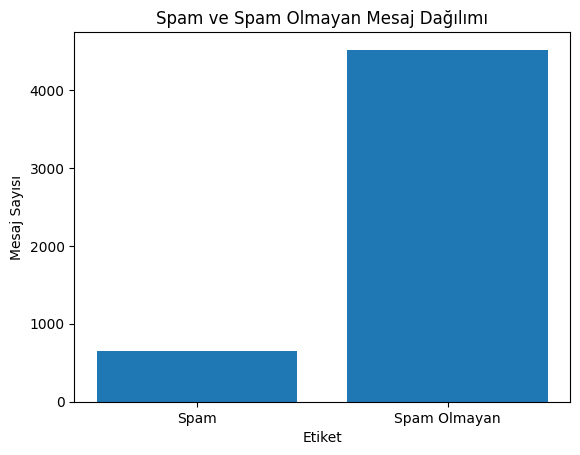

In [947]:
# Çubuk grafik oluşturma
plt.bar(['Spam', 'Spam Olmayan'], [spam_count, ham_count])
plt.xlabel('Etiket')
plt.ylabel('Mesaj Sayısı')
plt.title('Spam ve Spam Olmayan Mesaj Dağılımı')
plt.show()

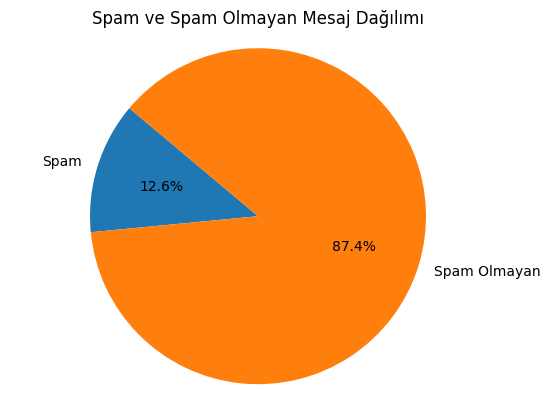

In [948]:
# Pasta grafik oluşturma
labels = ['Spam', 'Spam Olmayan']
sizes = [spam_count, ham_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Daireyi yuvarlak olarak ayarlar
plt.title('Spam ve Spam Olmayan Mesaj Dağılımı')
plt.show()

<Axes: >

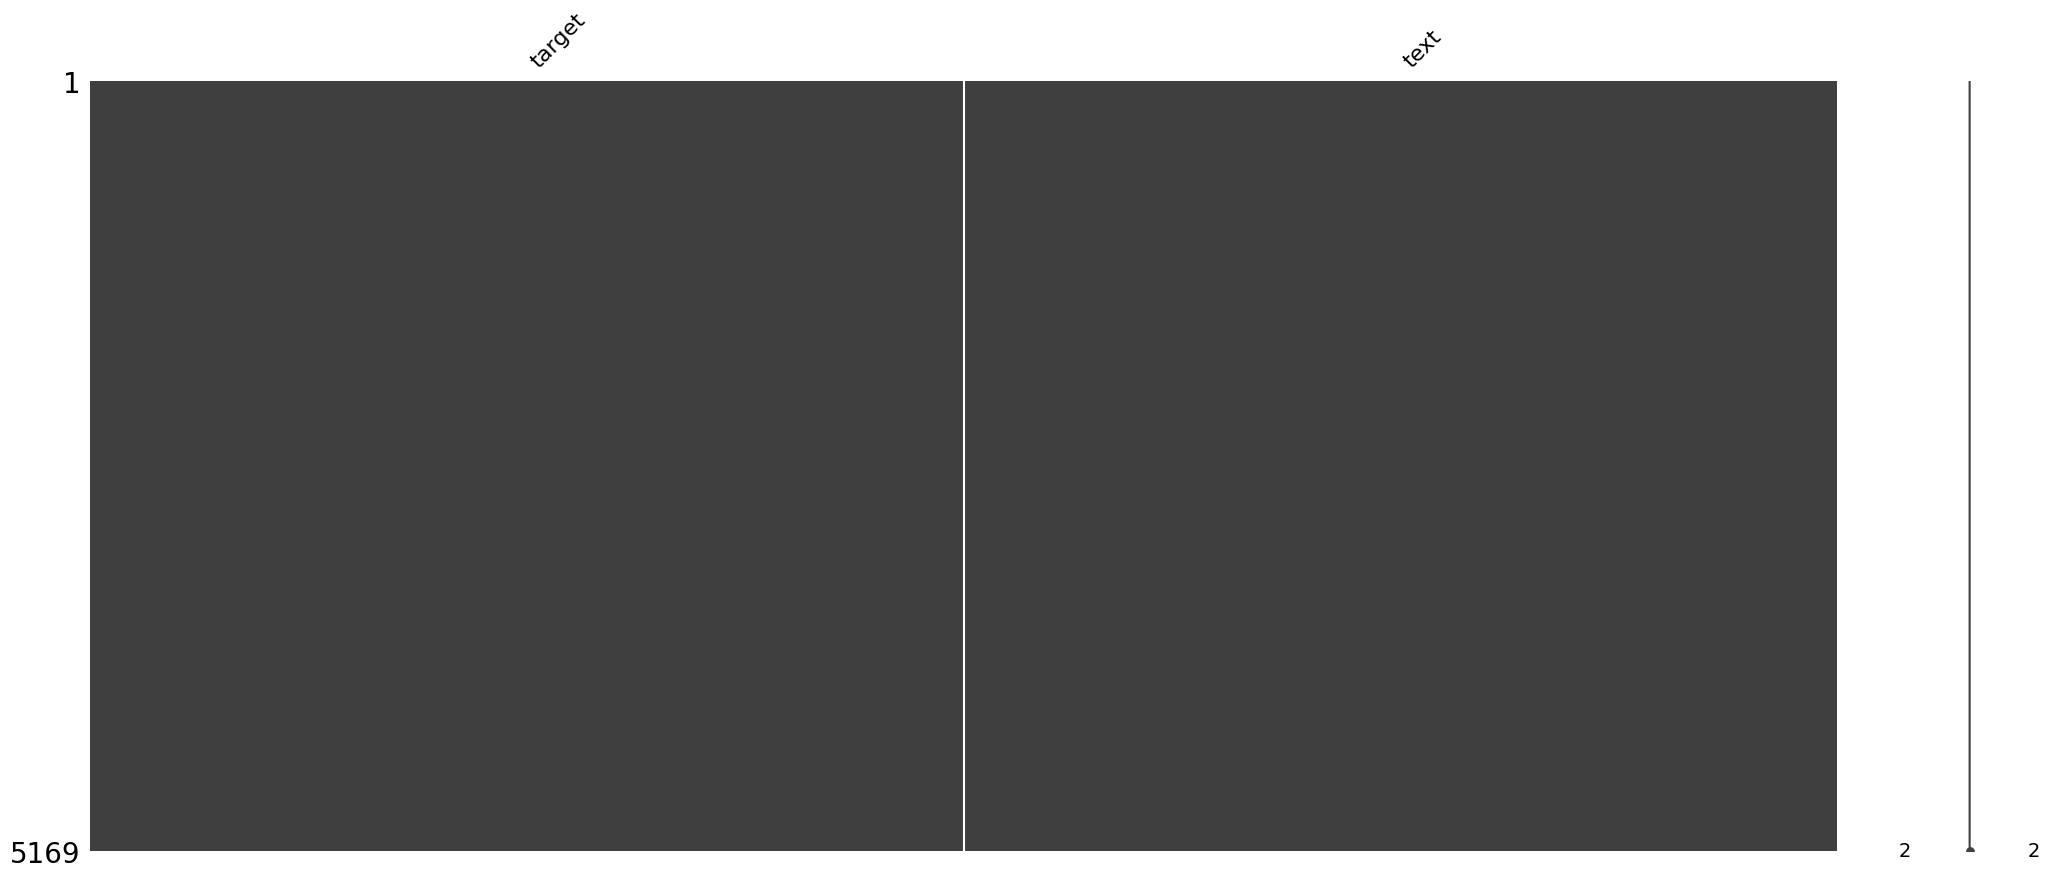

In [949]:
msno.matrix( data.iloc[:])

In [950]:
data["target"].apply(lambda x: 0 if x == "spam" else 1) # Burda 1 Olanların İsimlerini Spam_değil 0 Olanların İsmini spam Yaptık.
print(data)


      target                                                                                                                                                               text
0          0                                                    Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1          0                                                                                                                                      Ok lar... Joking wif u oni...
2          1        Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3          0                                                                                                                  U dun say so early hor... U c already then say...
4          0                                                                                                      Nah I 

In [951]:
not_spam = data[data["target"]==0] # Spam Olmayan Mesajları Sıralıyoruz.
not_spam

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
6,0,Even my brother is not like to speak with me. They treat me like aids patent.
...,...,...
5162,0,Huh y lei...
5165,0,Will Ì_ b going to esplanade fr home?
5166,0,"Pity, * was in mood for that. So...any other suggestions?"
5167,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [952]:
spams = data[data['target']==1] #Spam olan Mesajları Sıralıyoruz.
spams 

,target,text
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
8,1,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,1,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
11,1,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"
...,...,...
5137,1,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX
5139,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O å£250 3 WANT å£800
5146,1,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records."
5163,1,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"


In [953]:
#4516 satır (gözlem) ve 3 sütun içerdiğini belirtiyor. 
not_spam.shape

(4516, 2)

In [954]:
#653 satır (gözlem) ve yine 3 sütun içerdiğini belirtiyor.
spams.shape 

(653, 2)

In [955]:
ham_sms = ham.sample(spams.shape[0])  # spam veri çerçevesiyle boyutları eşitledim burda.
not_spam = data[data["target"] == 1]

# "not_spam" veri çerçevesini "spam" veri çerçevesiyle boyutları eşitledim.
not_spam = not_spam.sample(spams.shape[0])

print("Yeni ham veri çerçevesi boyutu:", ham_sms.shape)
print("Yeni not_spam veri çerçevesi boyutu:", not_spam.shape)
print("Spam veri çerçevesi boyutu:", spams.shape)



Yeni ham veri çerçevesi boyutu: (653, 2)
Yeni not_spam veri çerçevesi boyutu: (653, 2)
Spam veri çerçevesi boyutu: (653, 2)


In [956]:
# Veri çerçevelerini birleştirerek dengelenmiş bir veri demeti oluşturup ve ardından oluşturulan veri çerçevesinin başlangıcını ve sonunu ekrana yazdırdım.
# Ki verilerimizin boyutları eşitlenmiş mi onun kontrol ediyoruz.

# "ham" ve "spam" veri çerçevelerini oluşturun
ham = data[data["target"] == 1].sample(spams.shape[0])
spams = data[data["target"] == 0]

# "ham" veri çerçevesini "spam" veri çerçevesine ekleyin
data = pd.concat([ham, spams], ignore_index=True)

# "ham" veri çerçevesinin ilk birkaç satırını ve son birkaç satırını yazdırın
print("Veri Çerçevesi Başlangıcı:")
print(ham.head())
print("\nVeri Çerçevesi Sonu:")
print(spams.tail())



Veri Çerçevesi Başlangıcı:
      target                                                                                                                                                                     text
115        1                You are a winner U have been specially selected 2 receive å£1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+) 
779        1         Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9996. Offer ends 14thMarch. T&C's apply. Opt-out availa
588        1                                                                                   You have an important customer service announcement. Call FREEPHONE 0800 542 0825 now!
12         1             URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
3852       1  GSOH? Good with SPAM the ladies?U could b a male 

In [957]:
X = data["text"]
y = data["target"]

In [958]:
# Verileri eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

Rastgele Ormanlar (Random Forests)

In [959]:
#Pipeline nesnesi oluşturuluyor
#İlk adım: "tfidf" vektörleştirmesi
#İkinci adım: "clf" Random Forest sınıflandırıcısı

clf_rf = Pipeline([("tfidf", TfidfVectorizer()), ("clf", RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [960]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [961]:
y_pred = clf_rf.predict(X_test)

In [962]:
clf_rf.predict(["Congratulations! You've won a luxury vacation package worth $10,000! Claim your prize now"])

array([1])

In [963]:
y_test

1566    0
1988    0
1235    0
2868    0
3435    0
       ..
1614    0
3555    0
2298    0
1519    0
1740    0
Name: target, Length: 1551, dtype: int64

In [964]:
# Confusion Matris
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1331    0]
 [  50  170]]


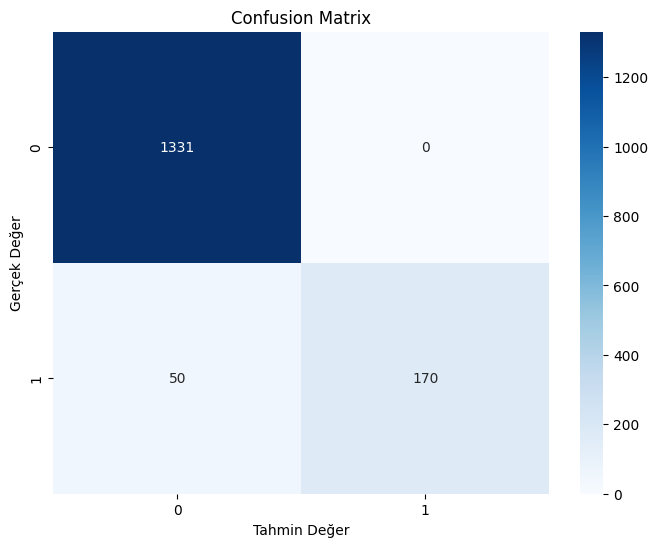

In [965]:
# Confusion matrix'i çizdir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Değer")
plt.ylabel("Gerçek Değer")
plt.show()

In [966]:
# Doğruluk (Accuracy) değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9677627337201805


In [967]:
# bir pipeline kur bulabildiğin ml modellerini tek tek eğitsin aynı veriyle veriyi karıştırıp tekrardan bölmesin eğiticek accuracy vericek confusion matrixini çıkaracak ve içlerindeki en iyi modeli accuracye göre söylesin.

Doğrusal Regresyon (Linear Regression)

In [968]:
#Bu Projede LineaRegression Yapamıyoruz Bunun Sebebi Çünkü LineaRegression Daha Çok Sayısal Veilerde Yapılıyor Olması.

Lojistik Regresyon (Logistic Regression)

In [969]:
# Verileri eğitim ve test kümelerine ayırma Burası Klasik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [970]:
# Pipeline_2 Diye Bir Pipeline Kuruyoruz.
pipeline_2 = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf", LogisticRegression())
])

In [971]:
# Modelimizi Burda Eğitiyoruz.
pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression())])

In [972]:
# Test verileri Üzerinde bir Tahminleme Yapıyoruz Burada.
y_pred = pipeline_2.predict(X_test)

In [973]:
# Confusion Matris
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1342    2]
 [  51  156]]


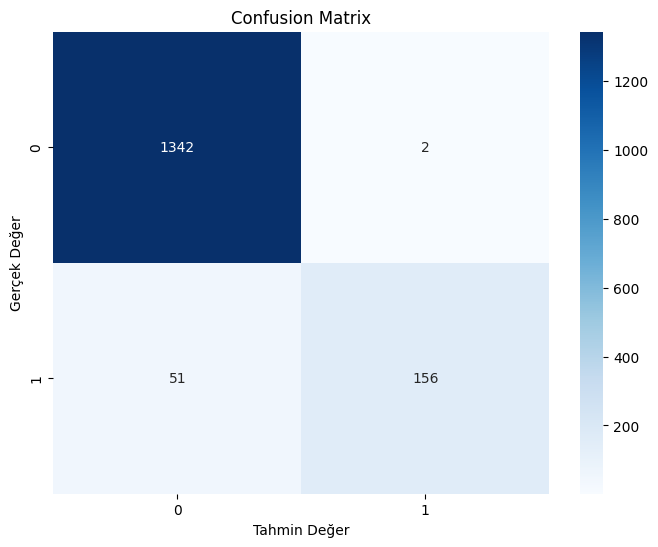

In [974]:
# Confusion matrix'i çizdir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Değer")
plt.ylabel("Gerçek Değer")
plt.show()

In [975]:
# Doğruluk (Accuracy) değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9658284977433914


Karar Ağaçları (Decision Trees)

In [976]:
# Verileri eğitim ve test kümelerine ayırma Burası Klasik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [977]:
# Pipeline_3 Diye Bir Pipeline Kuruyoruz.
pipeline_3 = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf", DecisionTreeClassifier())
])

In [978]:
# Modelimizi Burda Eğitiyoruz.
pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', DecisionTreeClassifier())])

In [979]:
# Test verileri Üzerinde bir Tahminleme Yapıyoruz Burada.
y_pred = pipeline_3.predict(X_test)

In [980]:
# Confusion Matris
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1321   23]
 [  32  175]]


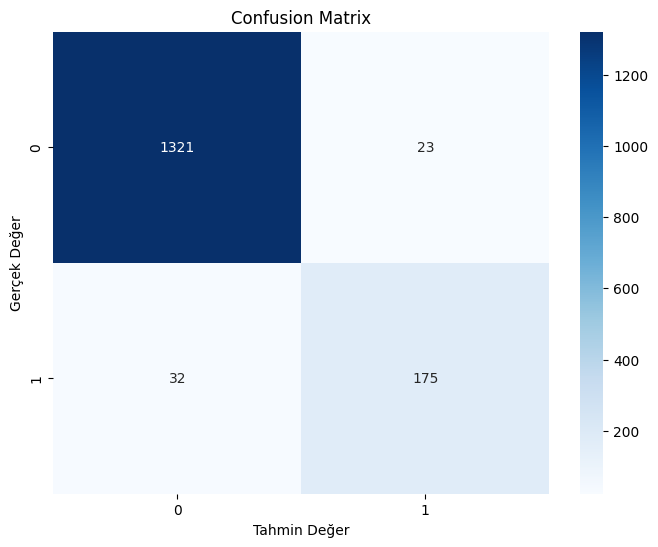

In [981]:
# Confusion matrix'i çizdir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Değer")
plt.ylabel("Gerçek Değer")
plt.show()

In [982]:
# Doğruluk (Accuracy) değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9645390070921985


Destek Vektör Makineleri (Support Vector Machines - SVM)

In [983]:
# Verileri eğitim ve test kümelerine ayırma Burası Klasik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [984]:
# Pipeline_4 Diye Bir Pipeline Kuruyoruz.
pipeline_4 = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf", SVC())
    ])

In [985]:
# Modelimizi Burda Eğitiyoruz.
pipeline_4.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)), ('clf', SVC())])

In [986]:
# Test verileri Üzerinde bir Tahminleme Yapıyoruz Burada.
y_pred = pipeline_4.predict(X_test)

In [987]:
# Confusion Matris
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1342    2]
 [  30  177]]


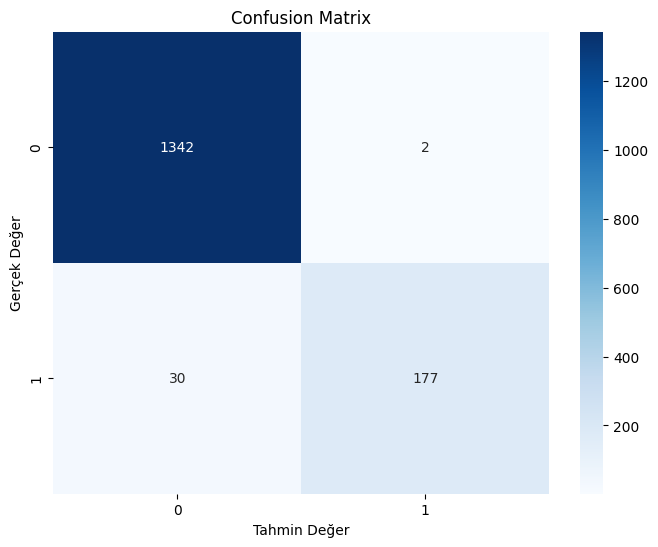

In [988]:
# Confusion matrix'i çizdir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Değer")
plt.ylabel("Gerçek Değer")
plt.show()

In [989]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9793681495809156


Gradient Boosting Modelleri

In [990]:
# Verileri eğitim ve test kümelerine ayırma Burası Klasik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [991]:
# Pipeline_5 Diye Bir Pipeline Kuruyoruz.
pipeline_5 = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf", GradientBoostingClassifier())
])

In [992]:
# Modelimizi Burda Eğitiyoruz.
pipeline_5.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', GradientBoostingClassifier())])

In [993]:
# Test verileri Üzerinde bir Tahminleme Yapıyoruz Burada.
y_pred = pipeline_5.predict(X_test)

In [994]:
# Confusion Matris
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1338    6]
 [  44  163]]


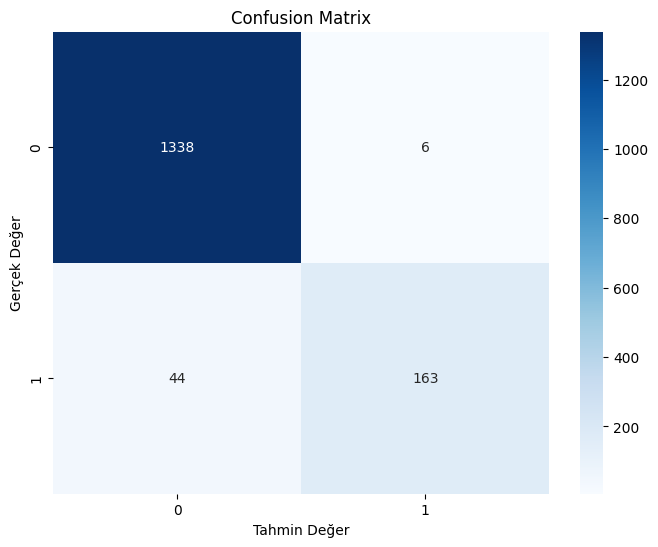

In [995]:
# Confusion matrix'i çizdir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Değer")
plt.ylabel("Gerçek Değer")
plt.show()

In [996]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9677627337201805


K-En Yakın Komşu (K-Nearest Neighbors - KNN)

In [997]:
# Verileri eğitim ve test kümelerine ayırma Burası Klasik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [998]:
# Pipeline_6 Diye Bir Pipeline Kuruyoruz.
pipeline_6 = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf",KNeighborsClassifier())
])

In [999]:
# Modelimizi Burda Eğitiyoruz.
pipeline_6.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', KNeighborsClassifier())])

In [1000]:
# Test verileri Üzerinde bir Tahminleme Yapıyoruz Burada.
y_pred = pipeline_6.predict(X_test)

In [1001]:
# Confusion Matris
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1344    0]
 [ 153   54]]


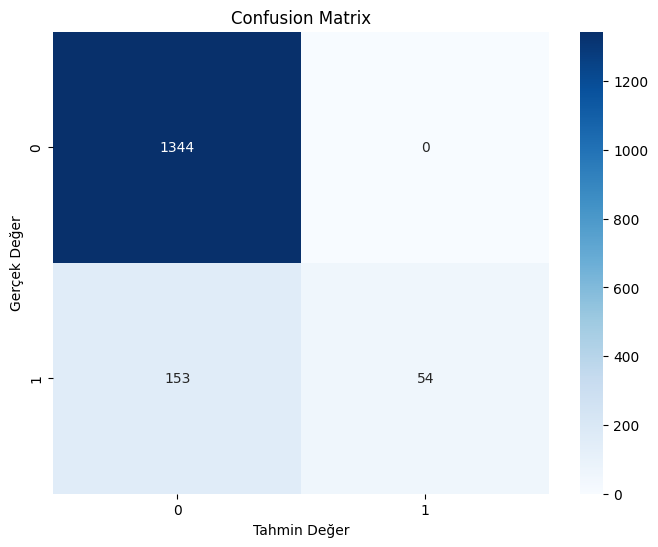

In [1002]:
# Confusion matrix'i çizdir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Değer")
plt.ylabel("Gerçek Değer")
plt.show()

In [1003]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9013539651837524


Naive Bayes: Metin sınıflandırma gibi problemlerde kullanılır. Bayes Teoremi'ne dayalı olarak çalışır ve "naive" yani "saf" varsayımları nedeniyle adını almıştır.

In [1004]:
# Verileri eğitim ve test kümelerine ayırma Burası Klasik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [1005]:
# Pipeline_7 Diye Bir Pipeline Kuruyoruz.
pipeline_7 = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf",MultinomialNB())
])

In [1006]:
# Modelimizi Burda Eğitiyoruz.
pipeline_7.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', MultinomialNB())])

In [1007]:
# Test verileri Üzerinde bir Tahminleme Yapıyoruz Burada.
y_pred = pipeline_7.predict(X_test)

In [1008]:
# Confusion Matris
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1344    0]
 [  72  135]]


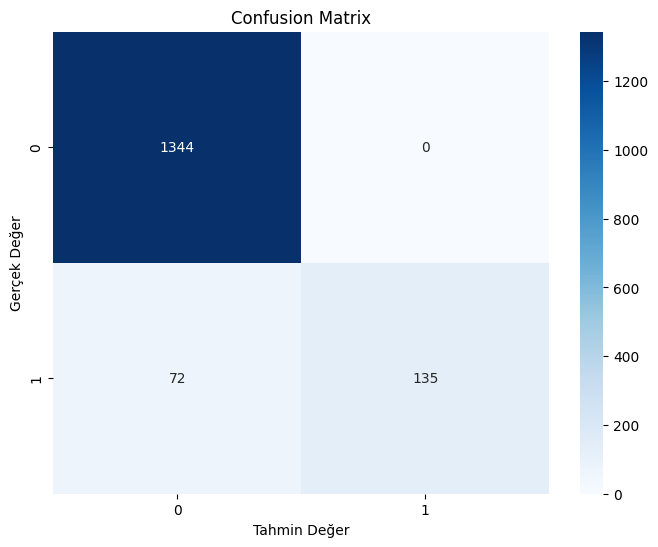

In [1009]:
# Confusion matrix'i çizdir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Değer")
plt.ylabel("Gerçek Değer")
plt.show()

In [1010]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9535783365570599


***BÜTÜN MODELLERİN HEPSİNİ BİR ARADA DEĞERLENDİRİYORUZ***

In [1011]:
# Veri çerçevesini karıştırma
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [1012]:
# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1013]:
# Metin verilerini TF-IDF özellik matrisine dönüştürme
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [1014]:
# Modelleri oluşturma kısmı.
models = [
    ("Naive Bayes", MultinomialNB()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC(kernel='linear', C=1.0)),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]
best_model = None
best_accuracy = 0

In [1015]:
def evaluate_models(models, X_train_tfidf, y_train, X_test_tfidf, y_test):
    best_accuracy = 0.0
    best_model = None
    
    for model_name, model in models:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        confusion_mat = confusion_matrix(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name

        print(f"{model_name} Accuracy:", accuracy)
        print(f"{model_name} Confusion Matrix:")
        print(confusion_mat)
        print()

    print("The Best Model:", best_model)

models = [
    ("Naive Bayes", MultinomialNB()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC(kernel='linear', C=1.0)),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

evaluate_models(models, X_train_tfidf, y_train, X_test_tfidf, y_test)


Naive Bayes Accuracy: 0.9516441005802708
Naive Bayes Confusion Matrix:
[[890   0]
 [ 50  94]]

Logistic Regression Accuracy: 0.9680851063829787
Logistic Regression Confusion Matrix:
[[890   0]
 [ 33 111]]

Random Forest Accuracy: 0.9738878143133463
Random Forest Confusion Matrix:
[[890   0]
 [ 27 117]]

Decision Tree Accuracy: 0.9632495164410058
Decision Tree Confusion Matrix:
[[874  16]
 [ 22 122]]

SVM Accuracy: 0.9796905222437138
SVM Confusion Matrix:
[[887   3]
 [ 18 126]]

Gradient Boosting Accuracy: 0.9661508704061895
Gradient Boosting Confusion Matrix:
[[886   4]
 [ 31 113]]

K-Nearest Neighbors Accuracy: 0.9013539651837524
K-Nearest Neighbors Confusion Matrix:
[[890   0]
 [102  42]]

The Best Model: SVM
